# This notebook is an exploratory data analysis for the Kaggle dataset, "League Of Legends High elo Ranked Games(2020)".

This data focuses on the high elo ranked games (Challenger, GrandMaster, Master).

Thank you to Minyong Shin on Kaggle for the dataset, which  can be found [here](https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020).

## "Write the tweet first" - decide which questions you want to answer before you do


I used the League of Legends ranked games data to find which factors impact the win chance the most.


I also found whether or not blue side gets any advantages over red.


# INDEX

## [Data Pre-processing](#data)

## Statistics

  * [Average Game Length](#game-length)
  * [Blue vs Red side](#blue-vs-red)

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [86]:
dir = 'data/'
ranks = ['Challenger', 'GrandMaster', 'Master']

data = pd.DataFrame()

for rank in ranks:
    data_in = pd.read_csv(dir+rank+'_Ranked_Games.csv')
    data_in['Rank'] = rank
    print(data_in.shape)
    data = data.append(data_in, ignore_index=True)
    
data.shape

(26904, 51)
(65896, 51)
(107125, 51)


(199925, 51)

In [87]:
data.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt', 'Rank

In [88]:
data.head(3)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank
0,4247263043,1323,0,1,0,0,0,0,0,0,...,73016,49832,533,64,12.8,138,8,38711,60463,Challenger
1,4247155821,1317,1,0,0,0,1,0,2,0,...,44218,37136,571,59,11.8,134,3,24829,14105,Challenger
2,4243963257,932,0,0,0,0,0,0,0,0,...,30797,35364,400,50,10.0,89,5,12589,45201,Challenger


<a id="game-length"></a>
## Average Game Length

Average game length: 23.89 minutes


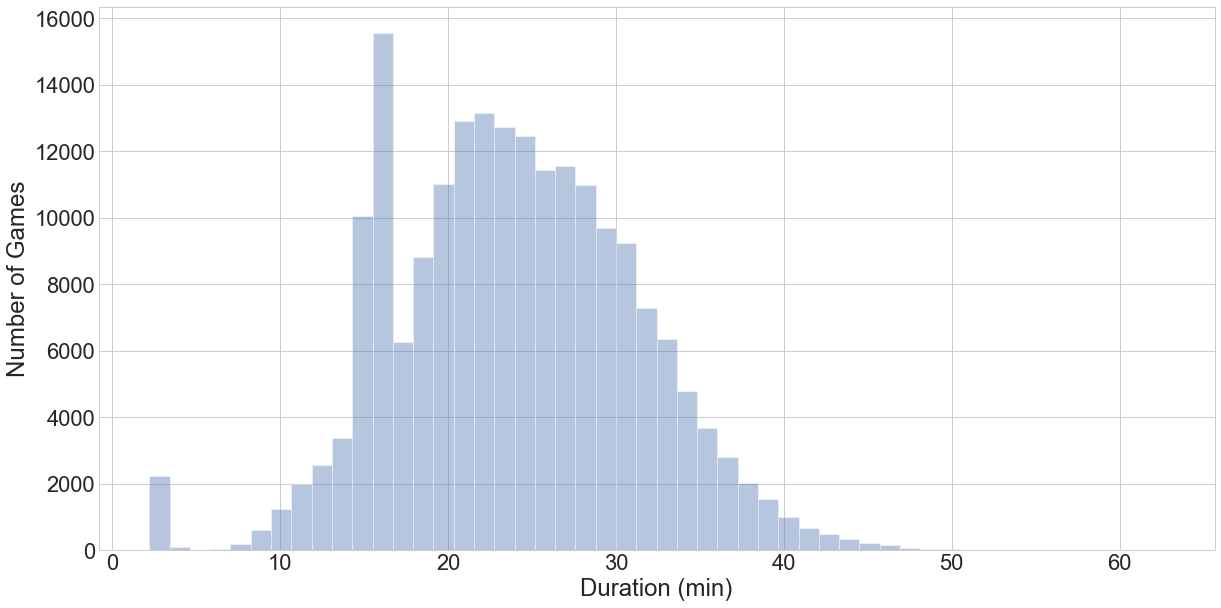

In [89]:
# game duration
print("Average game length: {:.2f} minutes".format(data['gameDuraton'].mean()/60))
plt.figure(figsize=(20,10))
sns.distplot(data['gameDuraton']/60, hist=True, kde=False)
sns.set(font_scale = 2)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Games')

plt.show()

<a id="blue-vs-red"></a>
## Blue vs Red side

In [90]:
# BLUE
# wins, firstblood, firsttower, firstbaron, firstdragon, firstinhib, dragon kills, baron kills, tower kills,
# inhib kills, ward placed, ward kills, kills, death, assist, championdamagedealt, totalgold, totalminionkills,
# totallevel, avglevel, jungleminionkills, killingspree, totalheal, objectdamagedealt

categories = ['Wins', 'FirstBlood', 'FirstTower',
       'FirstBaron', 'FirstDragon', 'FirstInhibitor',
       'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills',
       'Death', 'Assist', 'ChampionDamageDealt', 'TotalGold',
       'TotalMinionKills', 'TotalLevel', 'AvgLevel',
       'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt']

blue_percentage_data = {}
# blue_percentage_data_list = []
# red_percentage_data_list = []
for category in categories:
    blue_total = data['blue'+category].sum()
    red_total = data['red'+category].sum()
    total = (blue_total + red_total).sum()
    
    blue_percent = blue_total/total
    red_percent = red_total/total
    
    blue_percentage_data[category] = blue_percent
    
#     blue_percentage_data_list.append(blue_percent)
#     red_percentage_data_list.append(red_percent)


blue_over = {k:v for k,v in blue_percentage_data.items() if (abs(v-0.5)>0.01) or k=="Wins"}
red_over = {k:1-v for k,v in blue_over.items()}

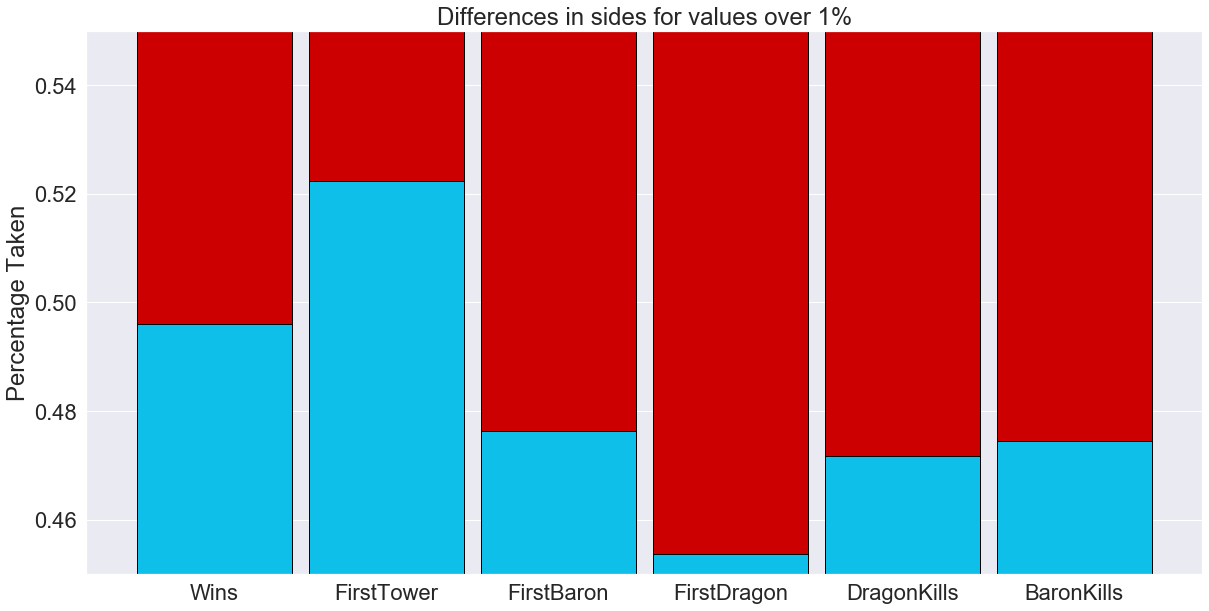

In [91]:

y = range(len(blue_over))
plt.figure(figsize=(20,10))
barWidth = 0.9
# blue
plt.bar(y, list(blue_over.values()), color='#0EBFE9', edgecolor='black', width=barWidth)
# red
plt.bar(y, list(red_over.values()), bottom=list(blue_over.values()), color='#cc0000', edgecolor='black', width=barWidth)

# Custom x axis
plt.xticks(y, blue_over.keys())
plt.ylim((0.45,0.55))
plt.ylabel("Percentage Taken")
plt.title("Differences in sides for values over 1%")
# Show graphic
plt.show()

In [ ]:
## NEXT: 
# First figure out the correlation between a blue win and first:
# [blood, tower, baron, dragon, inhibitor, dragon kill, baron kill]


## CORRELATIONAL DATA